In [2]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras


import matplotlib.style
import matplotlib as mpl


In [3]:
mnist = keras.datasets.mnist #data set of handwritten numbers
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() #Note each data point/pixl can take a value in range 0-255

print(train_images.shape) #Shape of training images
print(train_labels.shape) #Number of training image
print(test_images.shape)

train_images=train_images/255 #normalise data
test_images=test_images/255

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)


2


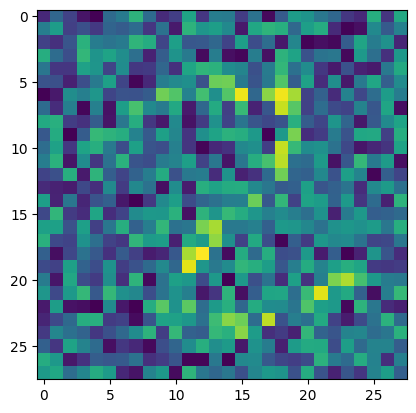

In [4]:
def add_noise(y,array):
  '''
  Adds noise y to an input array and outputs normalised array
  '''
  noise_arr = array + np.random.uniform(0,y,array.shape)
  return noise_arr/np.max(noise_arr)

img = np.random.randint(len(train_labels))
noise = 2

plt.imshow(add_noise(noise,train_images[img])) #Shows noisy array
print(train_labels[img]) #prints respective label

In [ ]:
#Training network without noise
model = keras.Sequential([ #Define paramaters of the model
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(lr=1.0), #Compile the model
              metrics=['accuracy'])

history=model.fit(train_images, train_labels,batch_size=100, epochs=30)

Epoch 1/30
600/600 [==============================] - 5s 4ms/step - loss: 1.0303 - accuracy: 0.7614
Epoch 2/30
600/600 [==============================] - 3s 4ms/step - loss: 0.4906 - accuracy: 0.8749
Epoch 3/30
600/600 [==============================] - 3s 5ms/step - loss: 0.4020 - accuracy: 0.8912
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 0.3609 - accuracy: 0.9003
Epoch 5/30
600/600 [==============================] - 2s 3ms/step - loss: 0.3352 - accuracy: 0.9063
Epoch 6/30
600/600 [==============================] - 2s 3ms/step - loss: 0.3166 - accuracy: 0.9112
Epoch 7/30
600/600 [==============================] - 2s 3ms/step - loss: 0.3018 - accuracy: 0.9155
Epoch 8/30
600/600 [==============================] - 2s 3ms/step - loss: 0.2892 - accuracy: 0.9186
Epoch 9/30
600/600 [==============================] - 2s 4ms/step - loss: 0.2785 - accuracy: 0.9216
Epoch 10/30
600/600 [==============================] - 2s 3ms/step - loss: 0.2690 - accuracy: 0.9244

313/313 - 1s - loss: 0.1656 - accuracy: 0.9532 - 758ms/epoch - 2ms/step
313/313 - 1s - loss: 0.3788 - accuracy: 0.8942 - 566ms/epoch - 2ms/step
313/313 - 1s - loss: 1.0026 - accuracy: 0.6788 - 566ms/epoch - 2ms/step
313/313 - 1s - loss: 1.7200 - accuracy: 0.5213 - 559ms/epoch - 2ms/step
313/313 - 1s - loss: 2.3462 - accuracy: 0.4388 - 592ms/epoch - 2ms/step
313/313 - 1s - loss: 2.8845 - accuracy: 0.3968 - 580ms/epoch - 2ms/step
313/313 - 1s - loss: 3.3085 - accuracy: 0.3665 - 581ms/epoch - 2ms/step
313/313 - 1s - loss: 3.6499 - accuracy: 0.3373 - 568ms/epoch - 2ms/step
313/313 - 1s - loss: 3.9342 - accuracy: 0.3134 - 565ms/epoch - 2ms/step
313/313 - 1s - loss: 4.1903 - accuracy: 0.2889 - 582ms/epoch - 2ms/step
313/313 - 1s - loss: 4.3923 - accuracy: 0.2737 - 591ms/epoch - 2ms/step
313/313 - 1s - loss: 4.5797 - accuracy: 0.2596 - 968ms/epoch - 3ms/step
313/313 - 1s - loss: 4.7347 - accuracy: 0.2398 - 851ms/epoch - 3ms/step
313/313 - 1s - loss: 4.8846 - accuracy: 0.2302 - 761ms/epoch - 2

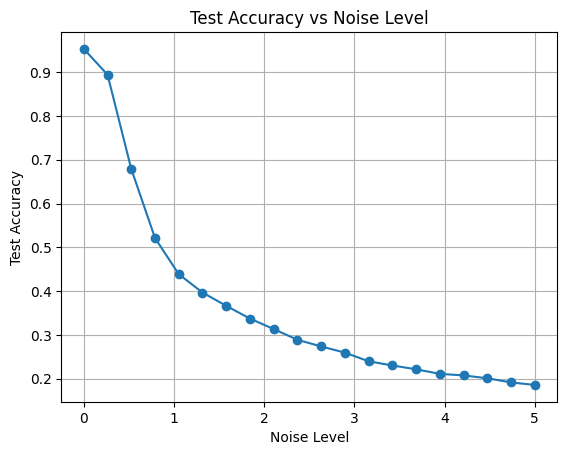

In [ ]:
noise = np.linspace(0,5,20)
test_accuracies = []

for i in noise:
  test_noise = add_noise(i,test_images)
  _, test_acc = model.evaluate(test_noise,  test_labels, verbose=2)
  test_accuracies.append(test_acc)

# Plot test accuracy vs noise level
plt.plot(noise, test_accuracies, marker='o')
plt.xlabel('Noise Level')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Noise Level')
plt.grid(True)
plt.show()

In [ ]:
#Train with noise
noise = 5
train_noise = add_noise(noise,train_images)

model_noise = keras.Sequential([ #Define paramaters of the model
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)])

model_noise.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(lr=1.0), #Compile the model
              metrics=['accuracy'])

history=model_noise.fit(train_noise, train_labels,batch_size=100, epochs=30)

NameError: name 'add_noise' is not defined

313/313 - 1s - loss: 0.7335 - accuracy: 0.8014 - 638ms/epoch - 2ms/step
313/313 - 1s - loss: 0.6219 - accuracy: 0.8128 - 506ms/epoch - 2ms/step
313/313 - 1s - loss: 0.5853 - accuracy: 0.8157 - 506ms/epoch - 2ms/step
313/313 - 1s - loss: 0.6024 - accuracy: 0.8027 - 785ms/epoch - 3ms/step
313/313 - 1s - loss: 0.6334 - accuracy: 0.7916 - 541ms/epoch - 2ms/step
313/313 - 0s - loss: 0.7112 - accuracy: 0.7676 - 493ms/epoch - 2ms/step
313/313 - 1s - loss: 0.8013 - accuracy: 0.7374 - 520ms/epoch - 2ms/step
313/313 - 1s - loss: 0.9046 - accuracy: 0.7019 - 515ms/epoch - 2ms/step
313/313 - 0s - loss: 1.0303 - accuracy: 0.6552 - 497ms/epoch - 2ms/step
313/313 - 1s - loss: 1.1411 - accuracy: 0.6137 - 504ms/epoch - 2ms/step
313/313 - 1s - loss: 1.2479 - accuracy: 0.5748 - 517ms/epoch - 2ms/step
313/313 - 1s - loss: 1.3586 - accuracy: 0.5446 - 518ms/epoch - 2ms/step
313/313 - 0s - loss: 1.4489 - accuracy: 0.5041 - 497ms/epoch - 2ms/step
313/313 - 0s - loss: 1.5451 - accuracy: 0.4776 - 496ms/epoch - 2

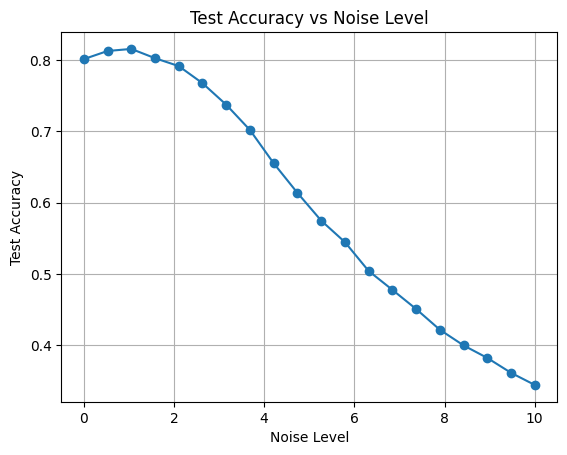

In [ ]:
noise = np.linspace(0,10,20)
test_accuracies = []

for i in noise:
  test_noise = add_noise(i,test_images)
  _, test_acc = model_noise.evaluate(test_noise,  test_labels, verbose=2)
  test_accuracies.append(test_acc)

# Plot test accuracy vs noise level
plt.plot(noise, test_accuracies, marker='o')
plt.xlabel('Noise Level')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Noise Level')
plt.grid(True)
plt.show()

Note performance was measured via accuracy of model against test image

Model trained with noise performed significantly better than untrained one when given a noisy dataset managing a higher accuracy for higher noise levels.

Notably there was a performance bump where the model performed marginally better for a small range noise>0. Furthermore, the model trained w/o noise took a negatively exponential shape for higher noise while the model trained with noise decreased more linearlly for higher noise (past the initial bump)

When trained against higher noises the model held higher accuracy for higer noise values than being trained with lower noise values.However, the inital accuracy was lower.

Therefore, the best noise to train with would depend on the input noise of the test images, most optimally a training noise at or slightly higher than the desiered input noise will lead to optimal performance/accuracy.

In [ ]:
print('Hi!')

Hi!


In [ ]:
model = keras.models.Sequential() #Add convolution layer and pooling
model.add(keras.layers.Conv2D(28, (4, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((4,4)))

model.add(keras.layers.Flatten()) #Flatten and get output
model.add(keras.layers.Dense(14, activation='relu'))
model.add(keras.layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) #Compiles model with adam optimiser

history = model.fit(train_images, train_labels,batch_size=200,epochs=15,
                    validation_data=(test_images, test_labels))

Epoch 1/15
300/300 [==============================] - 5s 5ms/step - loss: 0.6505 - accuracy: 0.8022 - val_loss: 0.1864 - val_accuracy: 0.9471
Epoch 2/15
300/300 [==============================] - 1s 4ms/step - loss: 0.1581 - accuracy: 0.9547 - val_loss: 0.1105 - val_accuracy: 0.9683
Epoch 3/15
300/300 [==============================] - 2s 6ms/step - loss: 0.1119 - accuracy: 0.9665 - val_loss: 0.0948 - val_accuracy: 0.9700
Epoch 4/15
300/300 [==============================] - 1s 4ms/step - loss: 0.0915 - accuracy: 0.9727 - val_loss: 0.0761 - val_accuracy: 0.9762
Epoch 5/15
300/300 [==============================] - 1s 4ms/step - loss: 0.0787 - accuracy: 0.9762 - val_loss: 0.0640 - val_accuracy: 0.9804
Epoch 6/15
300/300 [==============================] - 1s 4ms/step - loss: 0.0693 - accuracy: 0.9792 - val_loss: 0.0614 - val_accuracy: 0.9809
Epoch 7/15
300/300 [==============================] - 1s 4ms/step - loss: 0.0631 - accuracy: 0.9811 - val_loss: 0.0674 - val_accuracy: 0.9776
Epoch 